# Deep Learning - Class Assessment

Q.1 Import the cifar10 dataset from ‘keras.datasets’. Perform 
all the data preprocessing required.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#### Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 317s 2us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

## Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

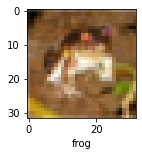

In [10]:
plot_sample(X_train, y_train, 0)

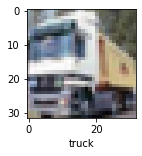

In [11]:
plot_sample(X_train, y_train, 1)

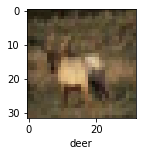

In [12]:
plot_sample(X_train, y_train, 3)

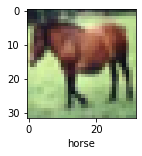

In [15]:
plot_sample(X_train, y_train, 7)

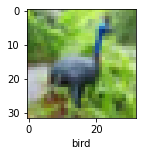

In [17]:
plot_sample(X_train, y_train, 6)

#### Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Q.2 Build a CNN architecture with Keras and stack an ANN on top of CNN

# Build simple artificial neural network for image classification

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.8570 - accuracy: 0.3345
Epoch 2/5
1563/1563 [==============================] - 49s 32ms/step - loss: 1.6592 - accuracy: 0.4130
Epoch 3/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5704 - accuracy: 0.4447
Epoch 4/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5073 - accuracy: 0.4690
Epoch 5/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4604 - accuracy: 0.4860


#### You can see that at the end of 5 epochs, accuracy is at around 48.60%

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.69      0.54      1000
           1       0.61      0.59      0.60      1000
           2       0.47      0.17      0.25      1000
           3       0.32      0.36      0.34      1000
           4       0.48      0.27      0.34      1000
           5       0.48      0.27      0.35      1000
           6       0.38      0.76      0.50      1000
           7       0.41      0.68      0.51      1000
           8       0.65      0.53      0.59      1000
           9       0.72      0.31      0.43      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



#### Now let us build a convolutional neural network to train our images

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Q.3 Fit and evaluate the model. Plot the training and validation curves.

In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4793 - accuracy: 0.4700
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1229 - accuracy: 0.6075
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0025 - accuracy: 0.6514
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9199 - accuracy: 0.6800
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8590 - accuracy: 0.7003
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8086 - accuracy: 0.7180
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7588 - accuracy: 0.7355
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7187 - accuracy: 0.7519
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6828 - accuracy: 0.7617
Epoch 10/10
1563/1563 [==============================] - 28s 18m

##### With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9677 - accuracy: 0.6841


[0.9677385687828064, 0.6840999722480774]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.67186983e-05, 2.93799239e-04, 1.13972323e-02, 3.76879662e-01,
        7.68362591e-03, 2.08689705e-01, 3.91456574e-01, 1.08755812e-05,
        3.46941943e-03, 7.23641642e-05],
       [4.63887397e-03, 5.75380802e-01, 1.86376417e-06, 1.54170436e-06,
        2.83096853e-07, 5.13914173e-08, 3.02373996e-06, 2.91832567e-08,
        4.10859615e-01, 9.11399163e-03],
       [2.47005031e-01, 2.92209089e-01, 3.59881879e-03, 8.85232389e-02,
        1.05968611e-02, 2.60404553e-02, 4.54863831e-02, 3.60069331e-03,
        1.17551535e-01, 1.65387884e-01],
       [7.88025856e-01, 1.41109116e-02, 1.19591810e-01, 1.64539572e-02,
        1.64159443e-02, 4.04256629e-03, 1.27376830e-02, 1.46840350e-04,
        1.96666121e-02, 8.80783331e-03],
       [1.87763897e-06, 1.72353182e-07, 1.24414712e-02, 2.75840946e-02,
        4.40563053e-01, 4.76160320e-03, 5.14611065e-01, 2.04737853e-06,
        3.46881425e-05, 3.02833172e-08]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[6, 1, 1, 0, 6]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

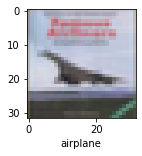

In [28]:
plot_sample(X_test, y_test,3)

In [34]:
classes[y_classes[3]]

'airplane'

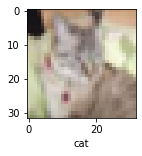

In [31]:
plot_sample(X_test, y_test,8)

In [36]:
classes[y_classes[8]]

'cat'

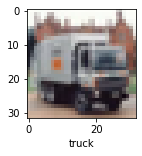

In [40]:
plot_sample(X_test, y_test,11)

In [41]:
classes[y_classes[11]]

'truck'